<a href="https://colab.research.google.com/github/andrewng88/Deep-Learning/blob/master/fastai_mnist_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
# setup google drive and fast.ai library
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#import required libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [0]:
# batch size
# need to divide by 2 if it's resnet50
bs = 64

In [8]:
# toy around wth MNIST_SAMPLE dataset

URLs.MNIST_SAMPLE

'http://files.fast.ai/data/examples/mnist_sample'

In [9]:
#download MNIST_SAMPLE from URL
path = untar_data(URLs.MNIST_SAMPLE) 

path

PosixPath('/root/.fastai/data/mnist_sample')

In [10]:
#display path
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [23]:
# load the labels.csv

df = pd.read_csv(path/'labels.csv')
df.sample(5)

,name,label
6360,train/7/47248.png,1
9988,train/7/24315.png,1
1147,train/3/27866.png,0
11315,train/7/47170.png,1
6181,train/7/51300.png,1


In [49]:
# prepare the data for training, we flip and normalize 
data = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(do_flip=True), size=26,bs=bs).normalize()
data.classes

[0, 1]

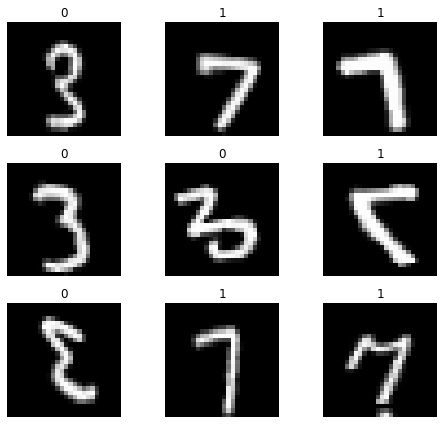

In [50]:
# 3 is labelled 0
# 7 is labelled 1
data.show_batch(rows=3, figsize=(7,6))

In [51]:
# transfer training for the dataset using resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.233138,0.099694,0.034304,02:33


In [52]:
# display the resnet33 architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
#save the model
learn.save('stage-1')

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

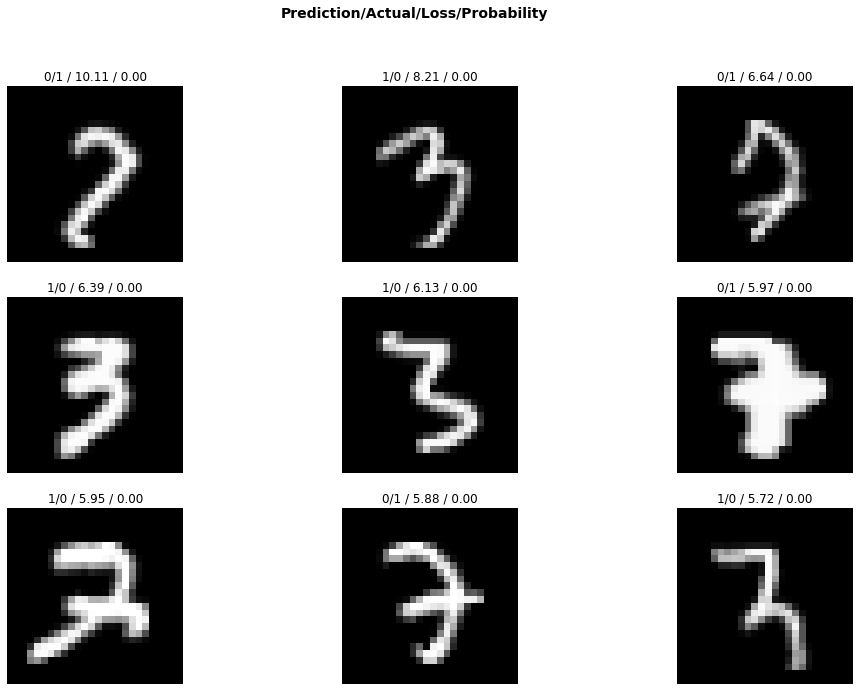

In [55]:
#plot those that we are very confident but predict wrongly
interp.plot_top_losses(9, figsize=(17,11))
# image described prediction , actual, loss, probability

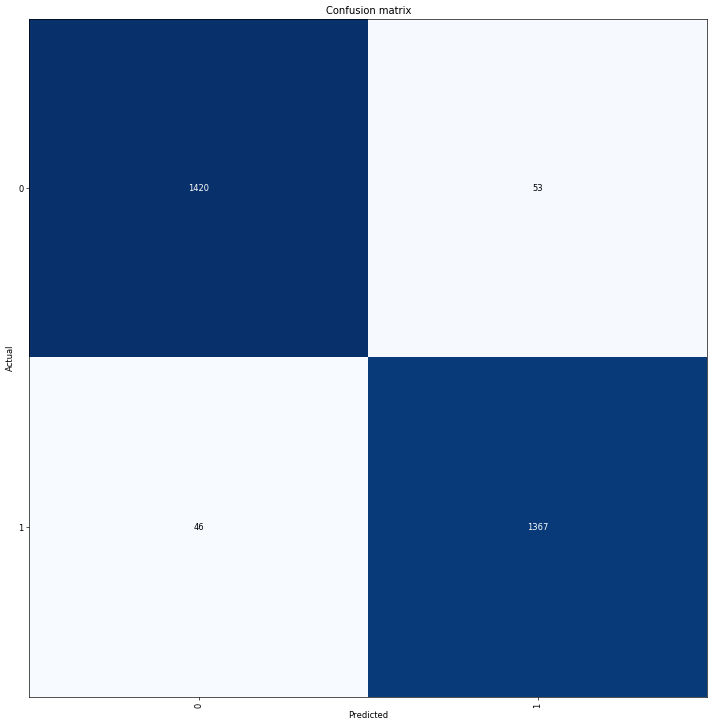

In [60]:
# plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
#All of the layers are trainable =True now.
learn.unfreeze()

In [64]:
learn.lr_find() #train the fastest 

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


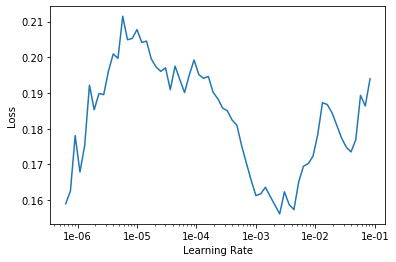

In [65]:
learn.recorder.plot()
# y axis is the loss
# x axis is the learning rate
# interpretation : learning rate got worst btw 5e-05 and 5e-2

In [66]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(5e-05,5e-2)) 
# start learning rate 5e-05 for the first layers, ends at 5e-2, the rest in between
# error rate improved from 0.034304 to 0.002426

epoch,train_loss,valid_loss,error_rate,time
0,0.086003,0.060782,0.005891,05:35
1,0.023270,0.010693,0.002426,05:18


In [68]:
interp2 = ClassificationInterpretation.from_learner(learn)

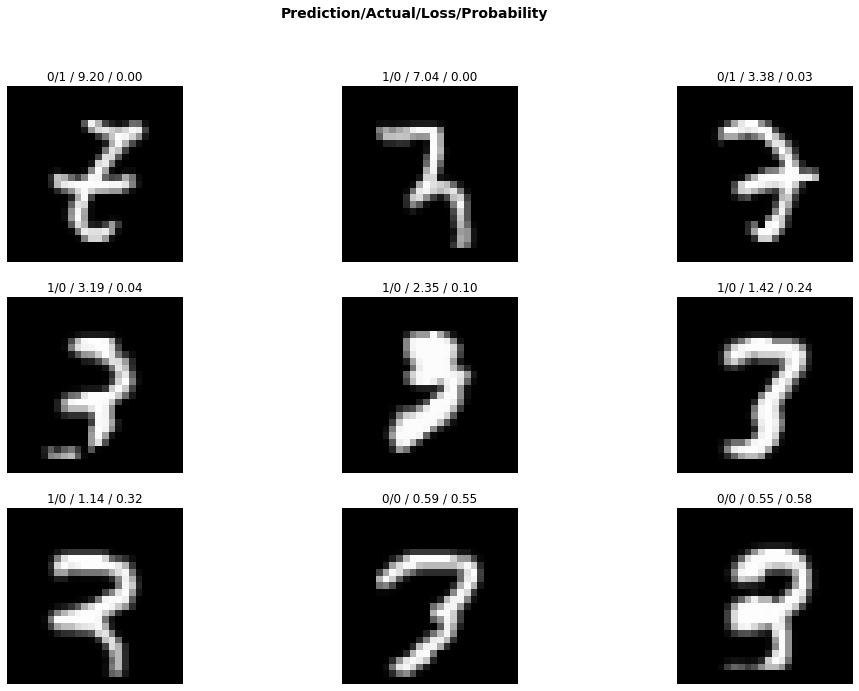

In [70]:
interp2.plot_top_losses(9, figsize=(17,11))

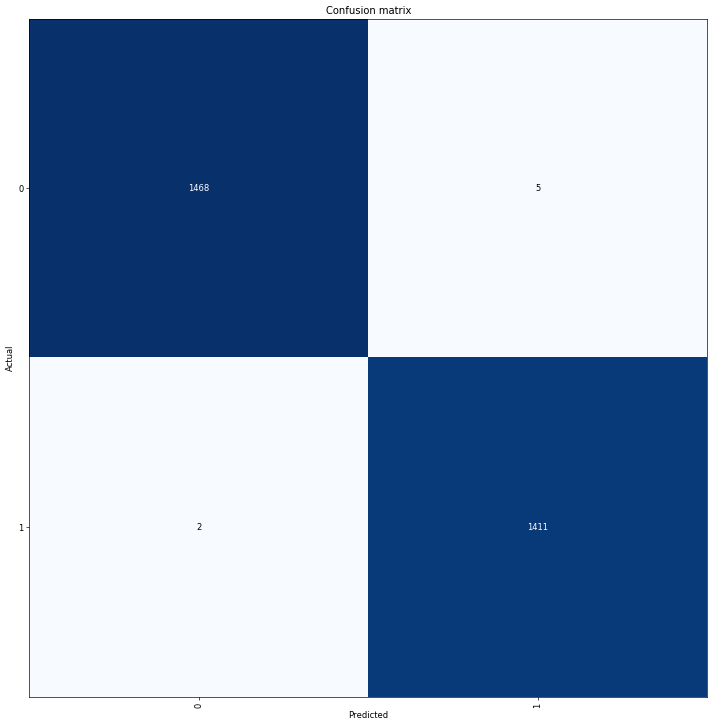

In [71]:
# plot confusion matrix
interp2.plot_confusion_matrix(figsize=(12,12), dpi=60)